In [12]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

In [13]:
df = pd.read_csv('https://raw.githubusercontent.com/glopez21/ML-Data/main/911.csv')

In [14]:
df.head()

,lat,lng,desc,zip,title,timeStamp,twp,addr,e
0,40.297876,-75.581294,REINDEER CT & DEAD END; NEW HANOVER; Station ...,19525.0,EMS: BACK PAINS/INJURY,2015-12-10 17:40:00,NEW HANOVER,REINDEER CT & DEAD END,1
1,40.258061,-75.264680,BRIAR PATH & WHITEMARSH LN; HATFIELD TOWNSHIP...,19446.0,EMS: DIABETIC EMERGENCY,2015-12-10 17:40:00,HATFIELD TOWNSHIP,BRIAR PATH & WHITEMARSH LN,1
2,40.121182,-75.351975,HAWS AVE; NORRISTOWN; 2015-12-10 @ 14:39:21-St...,19401.0,Fire: GAS-ODOR/LEAK,2015-12-10 17:40:00,NORRISTOWN,HAWS AVE,1
3,40.116153,-75.343513,AIRY ST & SWEDE ST; NORRISTOWN; Station 308A;...,19401.0,EMS: CARDIAC EMERGENCY,2015-12-10 17:40:01,NORRISTOWN,AIRY ST & SWEDE ST,1
4,40.251492,-75.603350,CHERRYWOOD CT & DEAD END; LOWER POTTSGROVE; S...,NaN,EMS: DIZZINESS,2015-12-10 17:40:01,LOWER POTTSGROVE,CHERRYWOOD CT & DEAD END,1


In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99492 entries, 0 to 99491
Data columns (total 9 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   lat        99492 non-null  float64
 1   lng        99492 non-null  float64
 2   desc       99492 non-null  object 
 3   zip        86637 non-null  float64
 4   title      99492 non-null  object 
 5   timeStamp  99492 non-null  object 
 6   twp        99449 non-null  object 
 7   addr       98973 non-null  object 
 8   e          99492 non-null  int64  
dtypes: float64(3), int64(1), object(5)
memory usage: 6.8+ MB


In [16]:
df.describe()

,lat,lng,zip,e
count,99492.000000,99492.000000,86637.000000,99492.0
mean,40.159526,-75.317464,19237.658298,1.0
std,0.094446,0.174826,345.344914,0.0
min,30.333596,-95.595595,17752.000000,1.0
25%,40.100423,-75.392104,19038.000000,1.0
50%,40.145223,-75.304667,19401.000000,1.0
75%,40.229008,-75.212513,19446.000000,1.0
max,41.167156,-74.995041,77316.000000,1.0


*What are the 5 zipcodes from 911 calls* 

In [17]:
df['zip'].value_counts().head()

19401.0    6979
19464.0    6643
19403.0    4854
19446.0    4748
19406.0    3174
Name: zip, dtype: int64

*What are the top 5 townships for 911 calls?*

In [18]:
df['twp'].value_counts().head()

LOWER MERION    8443
ABINGTON        5977
NORRISTOWN      5890
UPPER MERION    5227
CHELTENHAM      4575
Name: twp, dtype: int64

In [19]:
df['title'].nunique()

110

In [20]:
df['title'].value_counts()

Traffic: VEHICLE ACCIDENT -    23066
Traffic: DISABLED VEHICLE -     7702
Fire: FIRE ALARM                5496
EMS: RESPIRATORY EMERGENCY      5112
EMS: CARDIAC EMERGENCY          5012
                               ...  
Fire: DIABETIC EMERGENCY           1
Fire: UNCONSCIOUS SUBJECT          1
Fire: SYNCOPAL EPISODE             1
EMS: BOMB DEVICE FOUND             1
Fire: PLANE CRASH                  1
Name: title, Length: 110, dtype: int64

In [21]:
df.isnull()

,lat,lng,desc,zip,title,timeStamp,twp,addr,e
0,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False
4,False,False,False,True,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...
99487,False,False,False,False,False,False,False,False,False
99488,False,False,False,False,False,False,False,False,False
99489,False,False,False,False,False,False,False,False,False
99490,False,False,False,False,False,False,False,False,False


In [22]:
#tell you how many null values are there 
df.isnull().sum()

lat              0
lng              0
desc             0
zip          12855
title            0
timeStamp        0
twp             43
addr           519
e                0
dtype: int64

## I would like to create new features

In [29]:
df['Reason'] = df['title'].apply(lambda title: title.split(':')[0]) #lambda is the same as def title():

In [28]:
df.head()

,lat,lng,desc,zip,title,timeStamp,twp,addr,e,Reason
0,40.297876,-75.581294,REINDEER CT & DEAD END; NEW HANOVER; Station ...,19525.0,EMS: BACK PAINS/INJURY,2015-12-10 17:40:00,NEW HANOVER,REINDEER CT & DEAD END,1,EMS
1,40.258061,-75.264680,BRIAR PATH & WHITEMARSH LN; HATFIELD TOWNSHIP...,19446.0,EMS: DIABETIC EMERGENCY,2015-12-10 17:40:00,HATFIELD TOWNSHIP,BRIAR PATH & WHITEMARSH LN,1,EMS
2,40.121182,-75.351975,HAWS AVE; NORRISTOWN; 2015-12-10 @ 14:39:21-St...,19401.0,Fire: GAS-ODOR/LEAK,2015-12-10 17:40:00,NORRISTOWN,HAWS AVE,1,Fire
3,40.116153,-75.343513,AIRY ST & SWEDE ST; NORRISTOWN; Station 308A;...,19401.0,EMS: CARDIAC EMERGENCY,2015-12-10 17:40:01,NORRISTOWN,AIRY ST & SWEDE ST,1,EMS
4,40.251492,-75.603350,CHERRYWOOD CT & DEAD END; LOWER POTTSGROVE; S...,NaN,EMS: DIZZINESS,2015-12-10 17:40:01,LOWER POTTSGROVE,CHERRYWOOD CT & DEAD END,1,EMS


In [30]:
df['Reason'].value_counts()

EMS        48877
Traffic    35695
Fire       14920
Name: Reason, dtype: int64

*Using sns to create a countplot of 911 calls by reason*

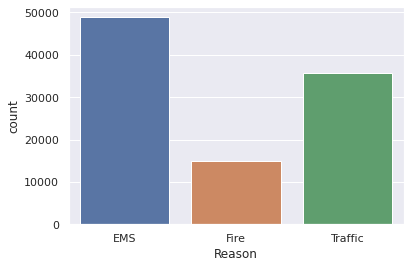

In [31]:
sns.countplot(x='Reason', data =df)

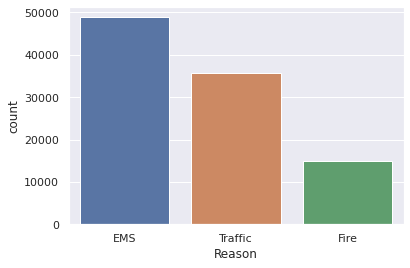

In [32]:
#Setting data in order
sns.countplot(x='Reason', data =df, order = df['Reason'].value_counts().index)